# Empalme con la clase anterior



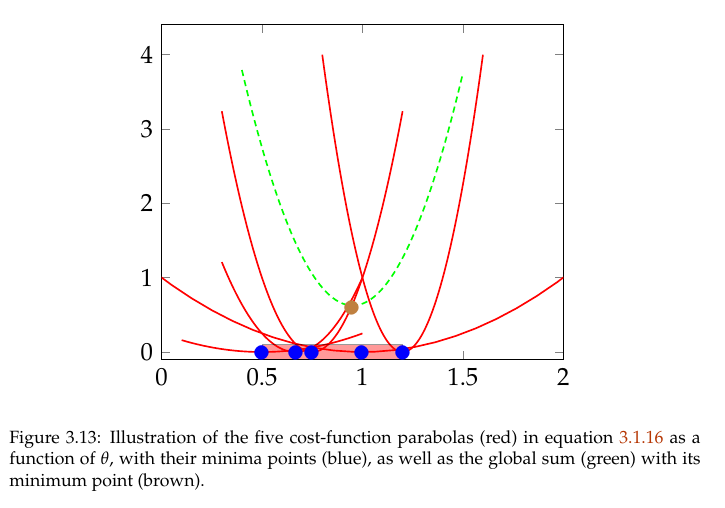

La zona de banda roja entre $[0.5, 1.2]$ se llama **zona de confusion**.

El mas pequenho de los minimos es $m$
El mas grande de los minimos es $M$

Si $\theta < m$ con seguridad *el gradiente global** es negativo y su negativo apunta a la derecha (donde esta el minimo global) punto cafe en la curva verde.

Si $\theta > M$ con seguridad *el gradiente global** es postivo y su negativo apunta a la izquierda (donde esta el minimo global).

La zona $[m, M]$ se llama **zona de confusion**?

Que pasa si ya estamos en la zona de confusion?

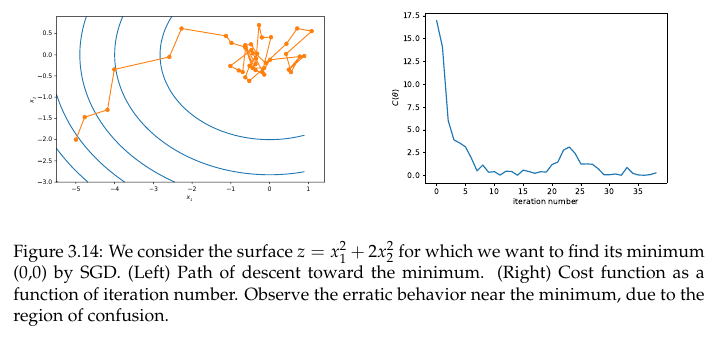

Formulamos tres preguntas del esquema Stochastic Descent

* Que pasa si estamos dentro de la zona de confusion?
Observe la fiura 3.14.  Suceden dos cosas
    * Early stopping (parar antes, en la iteracion 5
    * Al fin y al cabo no es bueno mucha precision en ML por que genera "overfitting".
* Como podemos determinar la incertidumbre del metodo?
Aca tambien mencionamos dos puntos importantes. Estadisticos.
    * la media. La esperanza esta dada por
$$\mathbb{E}[ \nabla C_i(\theta_i)] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta) $$.
Esta formula nos da esperanza en que el metodo estocasitco no esta mal, por que sus datos fluctuan al rededor de la media que es gradiente global. "Lo me encuentro por lo que se me pierde". El error por defecto se puede balancear, (con esperanza de que si) con el rror for execso.
Ahora bien la densidasd de probabilidad no es necesariamente uniforme. Puede que este determinada por una distribucino $\mu_i$.

$$\mathbb{E}[ \nabla C_i(\theta_i)] =  \sum_{i=1}^m \mu_i \nabla C_i(\theta) = \nabla J(\theta) $$.

*  
    * la varianza. Es muy importante por que mide la dispersion de los datos.

    $$\mathbb{V}[ \nabla C_i(\theta)]  = \frac{1}{m-1} \sum_{i=1}^m
    \| \nabla C_i(\theta) - \nabla J(\theta) \|^2 $$

[ver biased vs unbiased variance](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance).

Esta varianza mide que tan dispersos estan los datos. Si es muy grande los datos estan muy "regados". Esto no es bueno. Si el gradiente es constante la varianza es 0 y el resultado es perfecto $\nabla C_i (\theta ) = \nabla J(\theta)$ pero esto no ocurre en la realidad.


* Como podemos estimar el tamanho correcto del parametro $\alpha$?
Este es tarea de investigacion. Hay mucho trabajo hecho. Algunos puntos.

    * Si el problema es lineal, lo ideal es CG=Conjugate Gradient. Es analitico. El ST=Steepest descent tambien es analitico. Lo vimos en la clase anterior.
    * Sin embargo los problemas interesante no son lineales. Que hacemos ahy?
        * los metodos de quasi-newton.
        * Momentum (Poliak)
        * Nesterov (alumno de Poliak)
        * Adam
        * Adagrad
        * AdaDelta
        * RMSprop.

Aparte del metodo **batch** y el SGD (Stochastic Gradient Descent)
existe el **minibatch**. El minibatch es un medio entre el batch y el SGD. Donde en vez una muestra se toman $n$ muestras $1 < n < m$
    * 1 para el SGD
    * $n$ **minibatch**
    *  $m$ batch.


El **minibatch** tiene varias propiedades
    * Suaviza el SGD.
    * Disminuye la varianza, enfoca mejor el minimo.
    * Es mas lento que el SGD por que usa $n$ en vez de $1$.

La idea es revolver los datos (shuffle) y luego se toman cada $K=m/n$ (brinco) muestras. Veamos el pseudocodigo.

Una epoca es cuando ya se termino de calcular el gradiente y se actualiza $\theta^{(i)}= \theta^{(i-1)} - \alpha \nabla J(\theta^{(i)})$

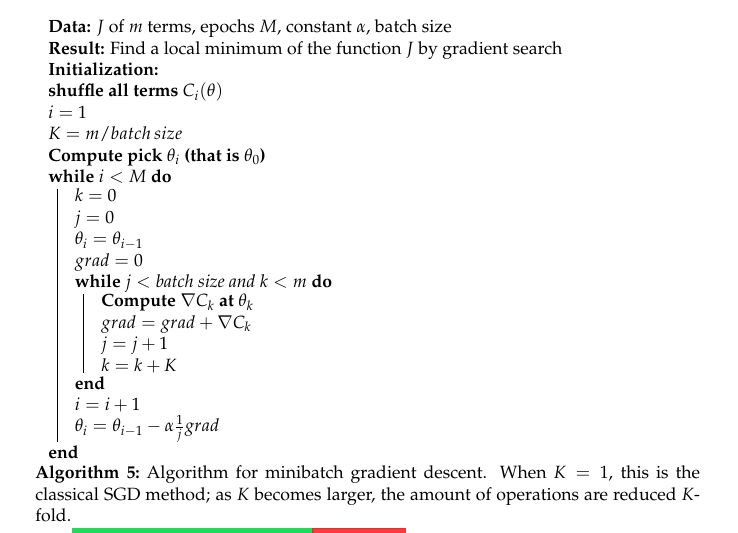

# Varios atributos (features): Regresion Multi-dimensional.
Vamos a asumir que hay 2 "features" (area y numero de habitaciones).
La nueva hipotesis para este problema es:

$$h(\theta_0, \theta_1, \theta_2; x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2  = (1, x_1, x_2) (\theta_0, \theta_1, \theta)^T $$



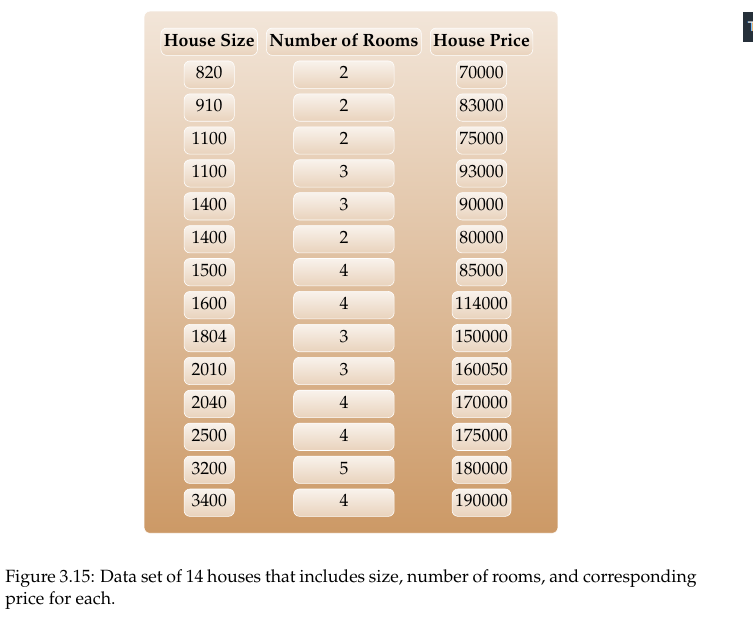

Construyamos el sistema de regresion lineal

$$X = \begin{pmatrix} 1 & 820 & 2 \\ 1 & 910 & 2 \\ 1 & 1100 & 3 \\
& \vdots &  \\ 1 & 3200 & 5 \\ 1 & 3400 & 4 \end{pmatrix}
\quad , \quad \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix}  \quad , \quad y = \begin{pmatrix}
70000 \\ 83000 \\ 75000 \\ \vdots \\  180000 \\ 190000
\end{pmatrix}$$
El sistema es $h(\theta) = X \theta = y$.

Para resolver este sistema usamos la minimizacion sobre la funcion de costo (minimos cuadrados)

$$J(\theta) = \frac12 \| h(\theta) - y \|^2 = \frac12 \| X \theta -y \|^2 $$
sacando $\nabla J(\theta)$ e igualandolo a cero obtenemos

$$X^T X \theta = X^T y $$

La solucion es
$$\theta = (X^T X)^{-1} X^T y  $$
$X^T X$ es positiva definida por que  las columnas de $X$ son linealmente independientes. El espacio nulo es 0.

Y que si no es positiva definida?

* $X^T X$ es singular (tiene autovalores 0). Que hacemos
    1. $\theta = X^+ y$, donde $X^+$ es la pseudoinversa.
    2. Otra opcion es regularizacion de Tikhonov. Sea $\lambda > 0$ y pequenho.

 $$\theta  = ( X^T X + \lambda I)^{-1} X^T y$$





# Feature Normalization.
Observe la Tabla Figura 3.15.  Vemos que los atributos "numero de habitaciones" y "area" son muy disparejos. El uno en escala de 1 a 10 y el otro en escala de muchos miles (80, 90, 100, etc).

La normalizacion se trata "emparejar" para eliminar estas diferencias.
Esta tiene los siguientes beneficios

1. Incrementa la velocidad de convergencia. Disminuyendo el zig-zageo.
2. Incrementa la precision, disminuyendo el numero de condicion $\kappa$.
3. Crea distancias mas interpretables que no estan dominadas por una escala.

La ecuacion original es
$$X \theta = y $$
Convertimos esta ecuacion a otro forma
$$X_n \theta_n = y $$
note que $y$ no cambia.
Luego de la normalizacion y solucion $\theta_n$ define una nueva hipotesis

Asuma una muestra $x^{(i)}$ que no esta en los datos de entrenamiento. Por ejemplo las dimensiones de su casa.

$$h(\theta_n) = [ x_n^{(i)}]^T \theta_n $$

## Distintos metodos de "feature normalization"

* **Estandarizacion** (Standarization): Se calcula la media de los datos. Se calcula la desviacion estandard. Se le resta la media y se divide por la destivacion estandard. Veamos la matematica.

$$X_j := \frac{X_j - \mu_j}{\sigma_j} $$
donde

$$\mu_j = \frac{\sum_{i=1}^m x_{ij}}{m} $$
suma sobre la columna de $X$.

$$\sigma_j = \sqrt{ \frac{\sum_{i=1}^m (x_{ij} - \mu_j)}{m}} $$
Los nuevos datos $X_j$ tienen media 0 y desviacion estandard $1$.

* **Mean normalization**: Esta se da removiendo la media de cada columna y dividiento por el "range" (el maximo menos minimo por columna)

$$X_j := \frac{X_j -\mu_j}{\max_i  \{ {x_{ij}  \}} - \min_i \{ x_{ij} \}} $$


* **Min-Max scaling**: La ecuacion esta dada por

$$X_j := \frac{X_j -\min_i \{ x_{ij}\}}{\max_i  \{ {x_{ij}  \}} - \min_i \{ x_{ij} \}} $$
Este si esta entre 0 y 1.

 * ** Vector norm normalization**: Simplemente divide por la norma del vector columna

 $$ X_j :=  \frac{X_j}{\| X_j \|} $$

 **Ejemplo 3.1.2**: Boston Housing Data set.

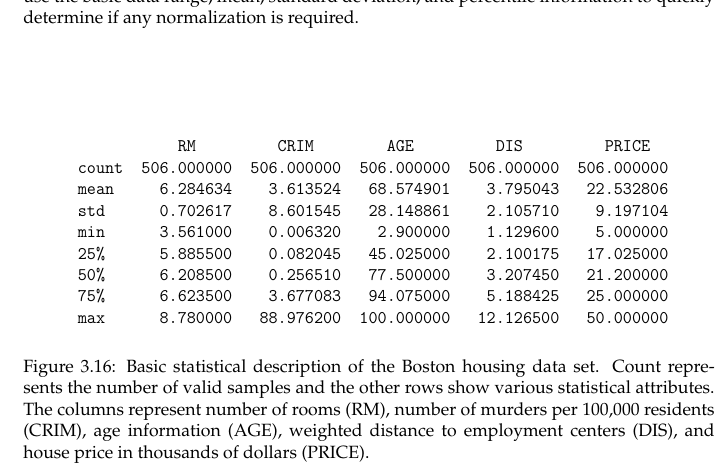

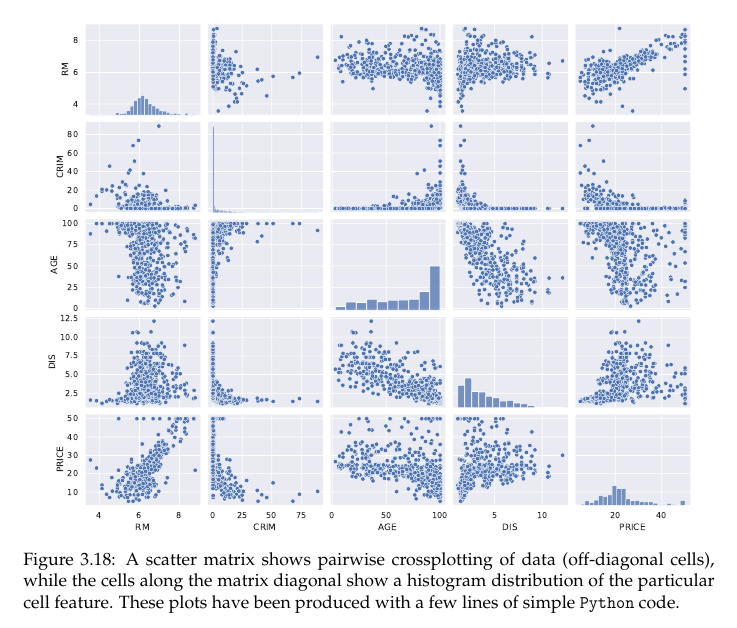

La Figura 3.19 muestra un histograma antes y despues del "feature normalization".

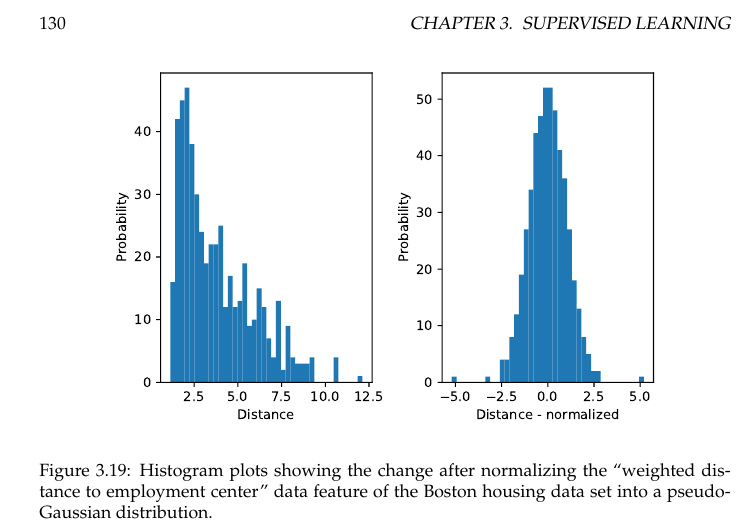

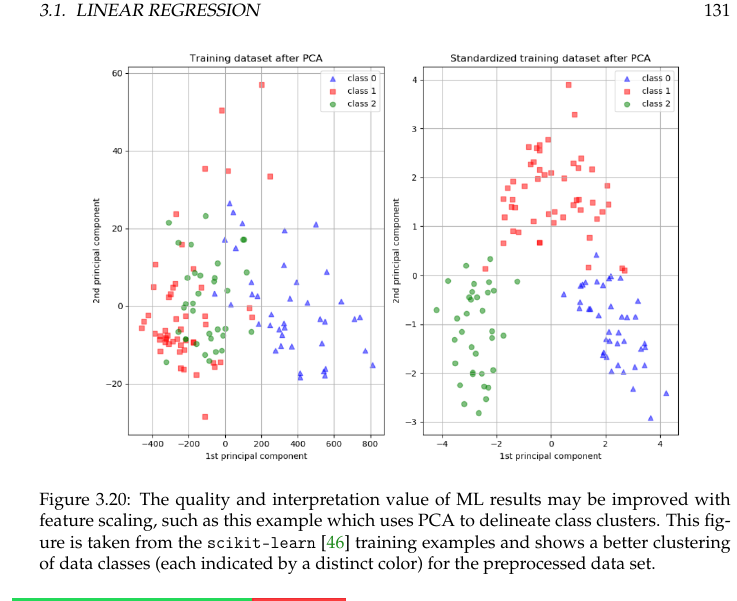

Otros dos   beneficios de feature normalization que no mencione antes se ilustra en
4. la grafica Figure 3.19. El "feature normalization" hizo que la distribucion (histograma) sea mas simetrica.
5. la grafica Figura 3.20: Aca el grafico de la izquierda consiste en un grupo de clusters (grupos) de datos en altas dimensiones que se redujo a 2 dimensiones usando PCA. A la derecha vemos el mismo conjunto de datos pero donde se aplico con anterioridad la standard normalization. Claramente el ejercicio mejor la separabilidad de los datos. Se pueden separar facilmente y se puedne recobrar los datos originales mediante el almacenamiento de las medias $\mu_j$, y las desviaciones estandard $\sigma_j$.

## Regresion Polinomial es regresion lineal

Veamos un polinmio en una variable (many features)

$$h(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots ++ \theta_n x^n  $$
En este caso tenemos $n+1$ features.

La hipotesis tambien se puede escribir de forma lineal:

$$h(\theta, x) = X \theta = (1, x, x^2, \cdots, x^n) (\theta_0, \theta_1, \cdots,  \theta_n) $$

Podemos a forma matricial. Los puntos son $(1, x_1, x_1^2 \cdots, x_1^n)$ y
$(1, x_2, x_2^2 , \cdots x_n^2)$ hasta $(1, x_m , x_m^2 , \cdots, x_m^n)$.

El sistem se convierte en $X \theta = y$ donde


$$\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots &  \vdots &  \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots &  \vdots &  \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\vdots \\
\theta_n
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
\vdots \\
y_m
\end{pmatrix}
$$

Si $m=n$ la matriz

$$V =
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots &  \vdots &  \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots &  \vdots &  \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n^2 & \cdots & \cdots & \cdots & x_n^n
\end{pmatrix}
 $$
 se llama la matriz de
 [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix)o
 En este caso la matriz es la matriz de interpolacion de Lagrange y solo en este caso interpolacion es equivalente a regresion.

 En la **regresion** la curva no tiene que pasar por los puntos.
 En la **interpolacion** la curva debe pasar por cada uno de los puntos.

 Generalmente $m \gg n$.

La matriz de Vandermonde tien inversa y si $n=m$

$$\theta = V^{-1} y $$

La matriz de regresion polinomica tiene dependencias. Las columnas son potencias de la primera $(x_1, x_2, \cdots, x_m)^T$. Todo depende de esta columna. Es como una "dependencia lineal"

# Regresion polinomica en varias variables.
La regresion polinomica, a pesar de tener muchos parametros es en 2D. Es una curva. Queremos generalizar aun mas. A superficies.

$$h(\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, x_1, x_2)=
\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2 $$
Es una funcion en dos variables $(x_1, x_2)$. Es una superficie.
Este ejemplo es solo hasta grado 2.

La matriz de este sistema es


$$X=
\begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 & x_{12}^2 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 & x_{22}^2 \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 & x_{m2}^2 \\
\end{pmatrix}
 $$

**Ejemplo**: La grafica sigjuiente muestra la regresion con polinomios de grado 3, 4, 5. Sobre una funcion $f(x)= \log(x) \sin (x)$



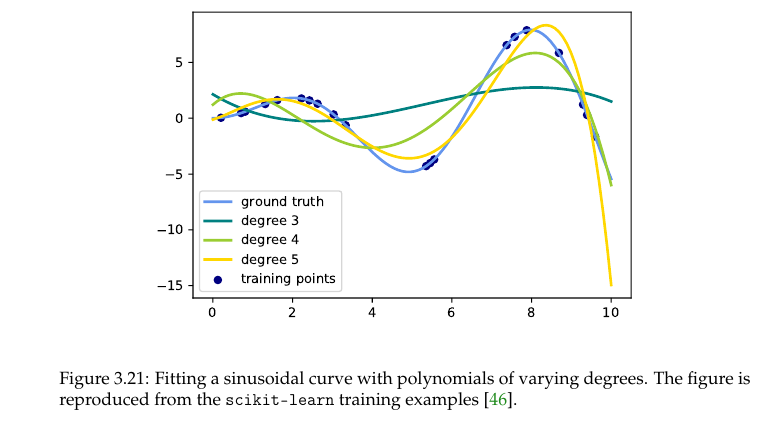

## Regresion polinomial general
Como ejemplo definimos una regresion polinomial en dos variables hasta grado 3 sin los terminos cuadraticos puros.

$$h(\theta) = p_\theta(x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 x_2 + \theta_5 x_1 x_2^2 + \theta_6 x_1^3 + \theta_7 x_2^3 $$

La matriz $X$ para este caso es

$$\begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 x_{12} & x_{11} x_{12}^2 & x_{11}^3 & x_{12}^3 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 x_{22} & x_{21} x_{22}^2 & x_{21}^3 & x_{22}^3 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 x_{m2} & x_{m1} x_{m2}^2 & x_{m1}^3 & x_{22}^3 \\
\end{pmatrix} $$

Al final veremos regresiones para funciones mas complejas que no sean polinomios. Por ejemplo con basea $(1, x, \sqrt{x})$. En este caso la hipotesis es
$$h(\theta) = \theta_0 + \theta_1 + \theta_2 \sqrt{x} $$
O $\log x, \exp(x)$

$h(\theta) = \theta_0 + \log x \theta_1 + \exp(x) \theta_2$
etc.



# Overfitting/Underfitting (sobreajuste/subajuste)
Para explicar el concepto incluimos la Figura 3.22

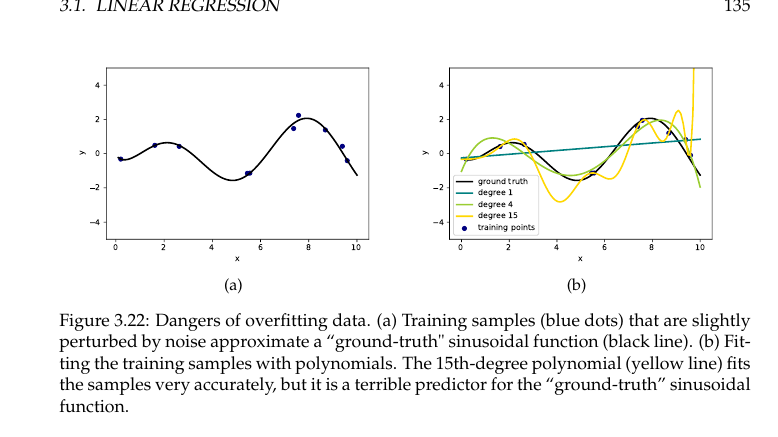

Algunos puntos a resaltar

* In la practica tenemos muchos mas puntos que "features" ($m \gg n$). En este sentido el problema es mas de regresion que de interpolacion. En el ejemplo de arriba el polinomio de grado 15 es interpolador.

* Si tenemos muchos "features" de tal forma que $n$ esta cerca a $m$. Vamos a tener muchas oscilaciones. Muy sensitivas al ruido. La curva puede seguir el rudio muy de cerca y esto no es buena.


**Underfitting**: Es lo opuesto a overfitting. Los "features" son muy pocos. Por ejemplo 2, $\theta_0, \theta_1$ en el caso lineal. Ver la curva azul en la grafica. En subajuste el modelo se aleja de los datos.  

Como podemos reducir el "overfitting".

* Reducir el numero de "features" (caracteristicas)
* Aplicar regularizacion (esto lo vemos en la sesion siguiente)
* Mas datos
* ocultar algunos de los datos de entrenamiento para usarlos como validacion.

## Regresion polinomica con regularizacion.
Nos referimos para explicar este tema a la grafica Figura 3.23

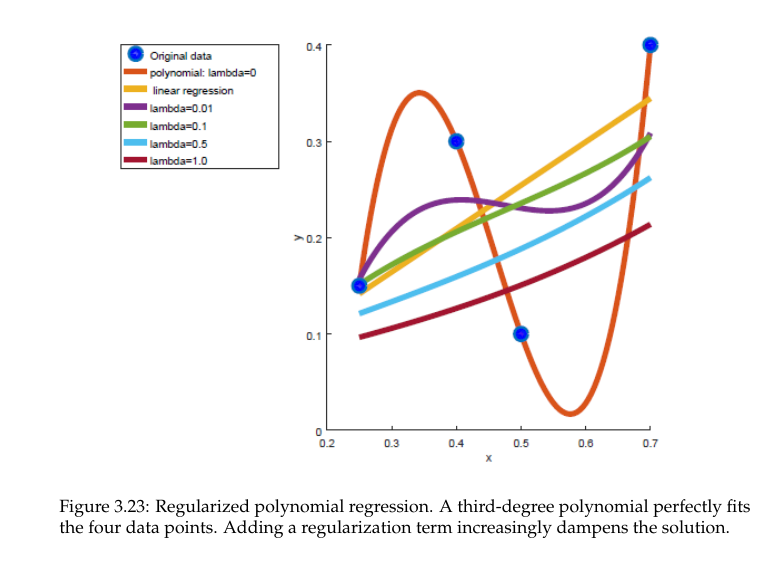

Por regularizacion me refiero a

$$J(\theta) = \frac12 \| X \theta - y \|^2 + \lambda \| \theta \|^2 $$

**Ejemplo 3.1.3** (Tercera ley de Kepler): Los datos para la relacion entre periodos (tiempo de translacion de los planetas) y radio (medio) de giro fueron tomados por Tycho Brahe. Johannes Kepler (1571-1630) obtuvo la siguiente ecuacion.

$$T(r, \theta_1) = \alpha r^{\theta_1} .$$
Los datos de Brahe estan en la Tabla  Figura 3.24.


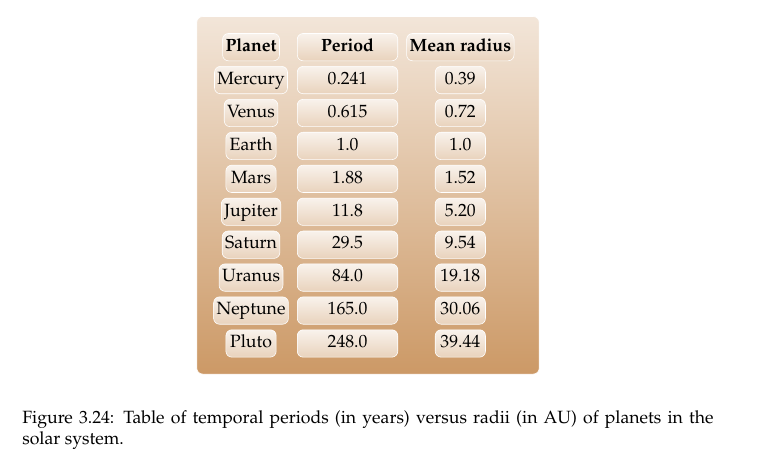

# K-fold cross-validacion. Validacion cruzada k-veces
Una forma de probar el algorimo y evitar el overfitting es con esta tecnica.

Ejemplo $k=4$. Cuatro grupos.

1. Se entrena con el 1,2,3, y se prueba con 4. Se puede calcular un RMS (Root mean squared error).
2. Se entrena con el 1,3,4, y se prueba con 2.
3. Se entrena con el 2,3,4, y se prueba con 1.
4. Se entrena con el 2,3,4, y se prueba con 1.

En cada caso se estudia el error. De todos los errores se saca el promedio.

Otros metodos de separar los datos son:
En la practica es comun que se separen los datos en 2 grupos. Por ejemplo 70% para entrenamiento y 30% para validacion.
A veces 3 grupos. Por ejemplo 60% entrenamiento, 20% para validacion y 10% para prueba.

De esto hablaremos con mas detalle en las proximas clases.

# Proxima clase: Regresion Logistica.